In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_excel('Uni.xlsx')
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [4]:
df.dtypes

Univ        object
SAT          int64
Top10        int64
Accept       int64
SFRatio      int64
Expenses     int64
GradRate     int64
dtype: object

In [5]:
df.shape

(25, 7)

In [6]:
len(df)

25

In [7]:
# Finding Unique values
df.nunique()

Univ        25
SAT         21
Top10       20
Accept      21
SFRatio     15
Expenses    25
GradRate    19
dtype: int64

In [8]:
# description of the data in the DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SAT,25.0,1266.44,108.359771,1005.0,1240.0,1285.0,1340.0,1415.0
Top10,25.0,76.48,19.433905,28.0,74.0,81.0,90.0,100.0
Accept,25.0,39.20,19.727308,14.0,24.0,36.0,50.0,90.0
SFRatio,25.0,12.72,4.067350,6.0,11.0,12.0,14.0,25.0
Expenses,25.0,27388.00,14424.883165,8704.0,15140.0,27553.0,34870.0,63575.0
GradRate,25.0,86.72,9.057778,67.0,81.0,90.0,94.0,97.0


In [9]:
df.corr()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
SAT,1.000000,0.922522,-0.885850,-0.812552,0.778976,0.747712
Top10,0.922522,1.000000,-0.859181,-0.643435,0.611467,0.745942
Accept,-0.885850,-0.859181,1.000000,0.631664,-0.558439,-0.819550
SFRatio,-0.812552,-0.643435,0.631664,1.000000,-0.781839,-0.560922
Expenses,0.778976,0.611467,-0.558439,-0.781839,1.000000,0.393591
GradRate,0.747712,0.745942,-0.819550,-0.560922,0.393591,1.000000


<AxesSubplot:>

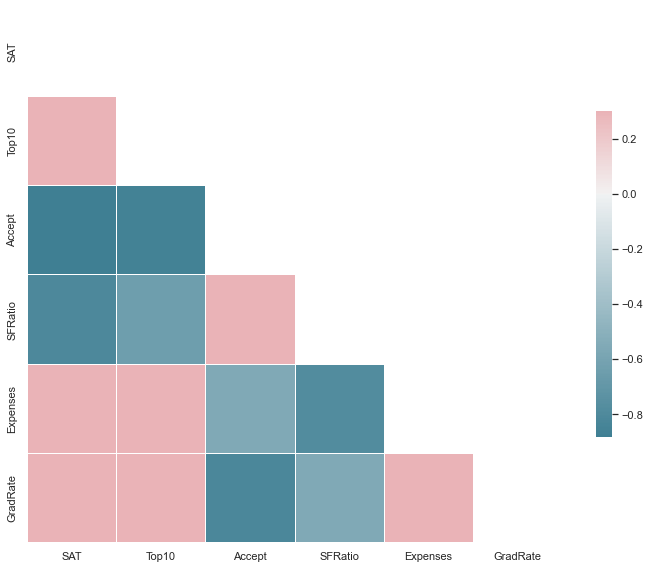

In [10]:
#Correlation
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
#Finding categorical columns in dataset
df.select_dtypes(include='object').columns

Index(['Univ'], dtype='object')

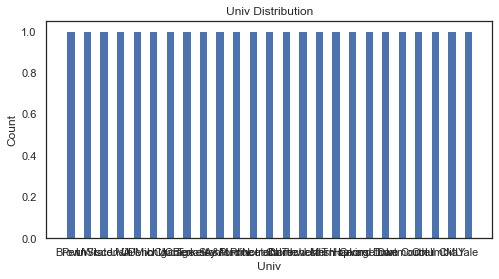

In [12]:
# Plot categorical
cat_col = df.select_dtypes(include='object').columns
for i, column in enumerate(cat_col):
    counts = df[column].value_counts()
    plt.figure(figsize=(8,4))
    plt.bar(counts.index, counts.values,width=0.5)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('{} Distribution'.format(column))

In [13]:
#Finding numerical columns in dataset
df.select_dtypes(exclude='object').columns

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

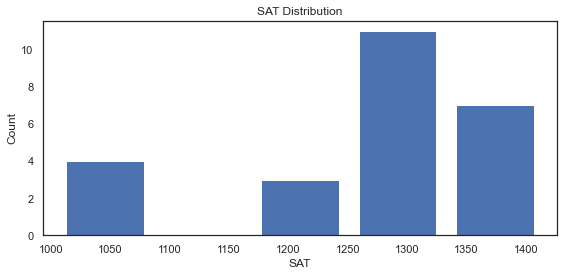

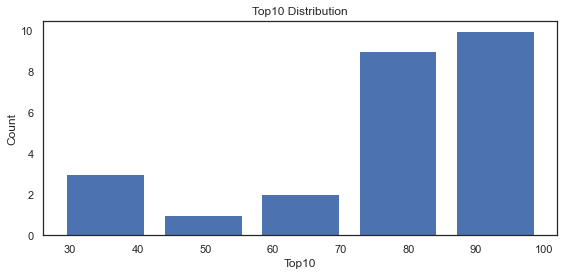

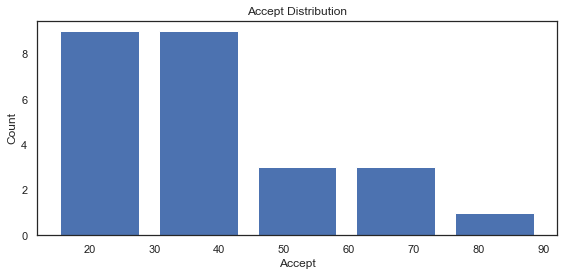

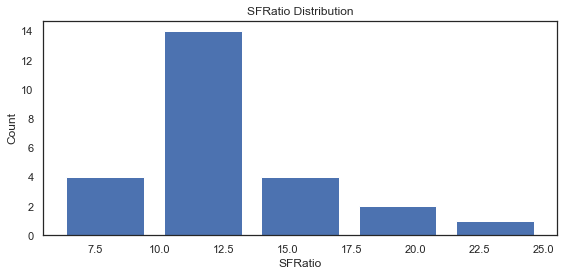

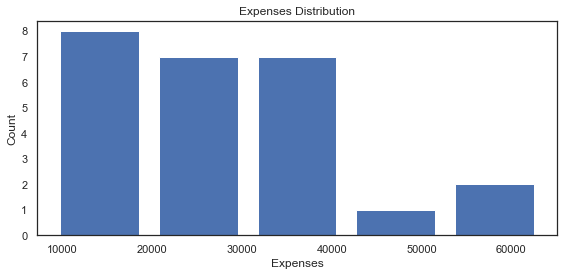

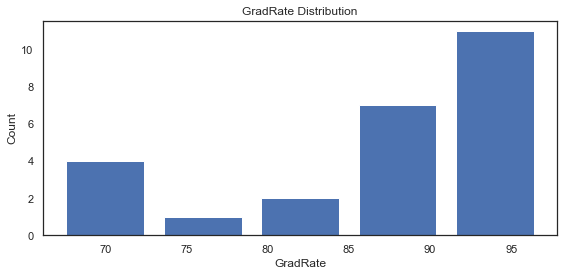

In [14]:
# Plot Numbers
num_col = df.select_dtypes(exclude='object').columns
for i, column in enumerate(num_col):
    plt.figure(figsize=(8,4))
    plt.hist(df[column],bins=5, rwidth=0.8)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('{} Distribution'.format(column))
    plt.tight_layout()
    plt.show()

<AxesSubplot:xlabel='SAT'>

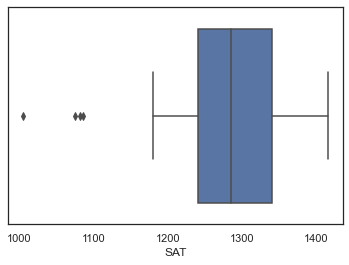

In [15]:
# Boxplot of SAT scores
sns.boxplot(x='SAT', data=df)

<AxesSubplot:xlabel='SAT', ylabel='Accept'>

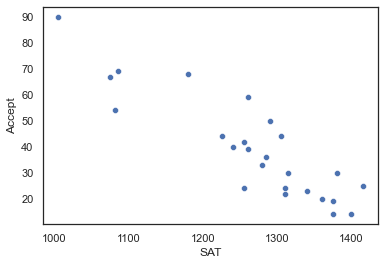

In [16]:
# Scatterplot of SAT scores and acceptance rate
sns.scatterplot(x='SAT', y='Accept', data=df)

In [17]:
# Grouped summary table
grouped = df.groupby('Univ').mean()
print(grouped)

                 SAT  Top10  Accept  SFRatio  Expenses  GradRate
Univ                                                            
Brown         1310.0   89.0    22.0     13.0   22704.0      94.0
CMU           1260.0   62.0    59.0      9.0   25026.0      72.0
CalTech       1415.0  100.0    25.0      6.0   63575.0      81.0
Columbia      1310.0   76.0    24.0     12.0   31510.0      88.0
Cornell       1280.0   83.0    33.0     13.0   21864.0      90.0
Dartmouth     1340.0   89.0    23.0     10.0   32162.0      95.0
Duke          1315.0   90.0    30.0     12.0   31585.0      95.0
Georgetown    1255.0   74.0    24.0     12.0   20126.0      92.0
Harvard       1400.0   91.0    14.0     11.0   39525.0      97.0
JohnsHopkins  1305.0   75.0    44.0      7.0   58691.0      87.0
MIT           1380.0   94.0    30.0     10.0   34870.0      91.0
Northwestern  1260.0   85.0    39.0     11.0   28052.0      89.0
NotreDame     1255.0   81.0    42.0     13.0   15122.0      94.0
PennState     1081.0   38

In [18]:
# Preprocessing

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64
0


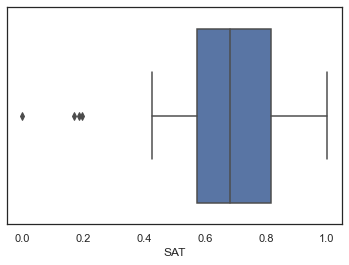

In [19]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())
df = df.drop_duplicates()

# Normalize numerical data
scaler = MinMaxScaler()
df[['SAT', 'Expenses']] = scaler.fit_transform(df[['SAT', 'Expenses']])

# Convert categorical data to numerical data
encoder = LabelEncoder()
df['Univ'] = encoder.fit_transform(df['Univ'])

# Check for outliers
sns.boxplot(x='SAT', data=df)

# Create a new feature
df['Expenses/Accept'] = df['Expenses'] / df['Accept']

# Split the data into training and testing sets
X = df.drop('Accept', axis=1)
y = df['Accept']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Expenses/Accept
0,0,0.743902,89,22,13,0.255144,94,0.011597
1,2,1.000000,100,25,6,1.000000,81,0.040000
2,1,0.621951,62,59,9,0.297461,72,0.005042
3,3,0.743902,76,24,12,0.415629,88,0.017318
4,4,0.670732,83,33,13,0.239835,90,0.007268


In [21]:
# Define the model
svm_model = SVR(kernel='rbf', C=100, gamma='auto')

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 437.033211596781


In [22]:
# Calculate metrics on the testing data
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 437.033211596781
Root Mean Squared Error: 20.905339308338935
Mean Absolute Error: 18.924061262749753
R-squared: -0.1020607514544607


In [23]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_pred})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
8,14,38.985444,24.985444
16,20,40.499347,20.499347
0,22,41.136863,19.136863
23,69,41.263104,-27.736896
11,39,41.261757,2.261757


In [24]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

18.924061262749753

In [25]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
8,14,38.985444,24.985444,624.272391
16,20,40.499347,20.499347,420.223221
0,22,41.136863,19.136863,366.219514
23,69,41.263104,-27.736896,769.335385
11,39,41.261757,2.261757,5.115547


In [26]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample

In [27]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
8,14,38.985444,24.985444,624.272391
16,20,40.499347,20.499347,420.223221
0,22,41.136863,19.136863,366.219514
23,69,41.263104,-27.736896,769.335385
11,39,41.261757,2.261757,5.115547


In [28]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

437.033211596781

In [29]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
8,14,38.985444,24.985444,624.272391
16,20,40.499347,20.499347,20.000000
0,22,41.136863,19.136863,20.000000
23,69,41.263104,-27.736896,20.000000
11,39,41.261757,2.261757,20.000000


In [30]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

140.85447814771376